## 本节包含基本的cv图像处理和数据增广

#### 图片导入与显示 image import and display

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# 导入图片
img_lenna_origin = cv2.imread("lenna.jpg",1)
print(img_lenna_origin.shape)
print(img_lenna_origin) # 可以看出这里图片也是一个三维矩阵

(500, 500, 3)
[[[139 158 219]
  [141 160 221]
  [140 161 223]
  ...
  [114 171 240]
  [ 93 149 220]
  [ 65 121 192]]

 [[139 158 219]
  [139 160 221]
  [140 161 223]
  ...
  [123 176 243]
  [ 96 149 216]
  [ 64 117 184]]

 [[138 159 221]
  [137 160 222]
  [137 160 222]
  ...
  [130 174 237]
  [102 146 209]
  [ 71 115 178]]

 ...

 [[ 12  17  15]
  [  7  12  10]
  [ 16  22  21]
  ...
  [ 48  77 146]
  [ 47  76 145]
  [ 47  76 145]]

 [[ 10  15  13]
  [  8  13  11]
  [ 20  26  25]
  ...
  [ 52  80 151]
  [ 53  81 152]
  [ 54  82 153]]

 [[  9  14  12]
  [  9  14  12]
  [ 23  29  28]
  ...
  [ 50  78 149]
  [ 53  81 152]
  [ 56  84 155]]]


In [3]:
img_lenna_origin_2 = cv2.imread("lenna.jpg",0)
print(img_lenna_origin_2.shape)
print(img_lenna_origin_2) # 这里是一个二维矩阵

(500, 500)
[[174 176 177 ... 185 164 136]
 [174 176 177 ... 190 163 131]
 [175 176 176 ... 188 160 129]
 ...
 [ 16  11  21 ...  94  93  93]
 [ 14  12  25 ...  98  99 100]
 [ 13  13  28 ...  96  99 102]]


In [4]:
# 使用cv2自带方法,用窗口显示图片,会有bug
cv2.imshow("lenna_origin_window", img_lenna_origin)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

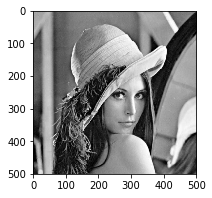

In [5]:
# plt打印图片
plt.figure(figsize=(3,3))
plt.imshow(img_lenna_origin_2, cmap='gray')
plt.show()



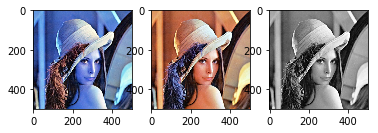

In [6]:
# subplot子图
plt.subplot(131)
plt.imshow(img_lenna_origin)
plt.subplot(132)
plt.imshow(cv2.cvtColor(img_lenna_origin,cv2.COLOR_BGR2RGB))
plt.subplot(133)
plt.imshow(img_lenna_origin_2,cmap='gray')
plt.show()

[[[219 158 139]
  [221 160 141]
  [223 161 140]
  ...
  [240 171 114]
  [220 149  93]
  [192 121  65]]

 [[219 158 139]
  [221 160 139]
  [223 161 140]
  ...
  [243 176 123]
  [216 149  96]
  [184 117  64]]

 [[221 159 138]
  [222 160 137]
  [222 160 137]
  ...
  [237 174 130]
  [209 146 102]
  [178 115  71]]

 ...

 [[ 15  17  12]
  [ 10  12   7]
  [ 21  22  16]
  ...
  [146  77  48]
  [145  76  47]
  [145  76  47]]

 [[ 13  15  10]
  [ 11  13   8]
  [ 25  26  20]
  ...
  [151  80  52]
  [152  81  53]
  [153  82  54]]

 [[ 12  14   9]
  [ 12  14   9]
  [ 28  29  23]
  ...
  [149  78  50]
  [152  81  53]
  [155  84  56]]]


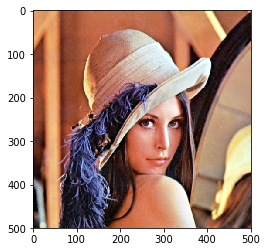

In [7]:
img_lenna_convert = cv2.cvtColor(img_lenna_origin,cv2.COLOR_BGR2RGB)
print(img_lenna_convert)
plt.imshow(img_lenna_convert)
plt.show()
# 可以看到cv2的这个通道转换,确实只是对第三维换了顺序

In [8]:
# 定义自己的显示图片函数
def my_show(img, size=(3,3)):
    plt.figure(figsize=size)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.show()

#### 图片裁切 image crop
其原理可以看成numpy数组的切片

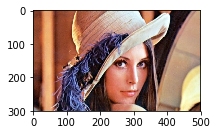

In [9]:
my_show(img_lenna_origin[100:400])

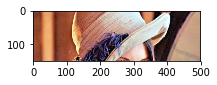

In [10]:
my_show(img_lenna_origin[100:400][0:150])

#### 通道分离 channel split

In [11]:
B,G,R = cv2.split(img_lenna_origin)
print(B)
print("*" * 50)
print(G)
print("*" * 50)
print(R)
# 可以看出,相当于把原来的三维矩阵的第三维单独抽出来,结果是3个2维矩阵

[[139 141 140 ... 114  93  65]
 [139 139 140 ... 123  96  64]
 [138 137 137 ... 130 102  71]
 ...
 [ 12   7  16 ...  48  47  47]
 [ 10   8  20 ...  52  53  54]
 [  9   9  23 ...  50  53  56]]
**************************************************
[[158 160 161 ... 171 149 121]
 [158 160 161 ... 176 149 117]
 [159 160 160 ... 174 146 115]
 ...
 [ 17  12  22 ...  77  76  76]
 [ 15  13  26 ...  80  81  82]
 [ 14  14  29 ...  78  81  84]]
**************************************************
[[219 221 223 ... 240 220 192]
 [219 221 223 ... 243 216 184]
 [221 222 222 ... 237 209 178]
 ...
 [ 15  10  21 ... 146 145 145]
 [ 13  11  25 ... 151 152 153]
 [ 12  12  28 ... 149 152 155]]


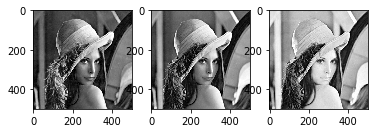

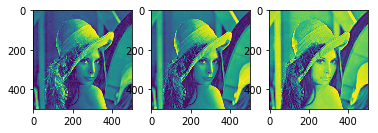

In [12]:
plt.subplot(131)
plt.imshow(B,cmap='gray')
plt.subplot(132)
plt.imshow(G,cmap='gray')
plt.subplot(133)
plt.imshow(R,cmap='gray')
plt.show()

plt.subplot(131)
plt.imshow(B)
plt.subplot(132)
plt.imshow(G)
plt.subplot(133)
plt.imshow(R)
plt.show()

# cv2.imshow('B',B)
# cv2.imshow('G',G)
# cv2.imshow('R',R)
# key = cv2.waitKey(0)
# if key == 27:
#     cv2.destroyAllWindows()

#### 修改特定通道的值可以让图片更冷或暖色

In [13]:
def img_cooler(img, b_increase, r_decrease):
    B,G,R= cv2.split(img)
    b_modify_max = 255-b_increase
    B[B>=b_modify_max] = 255
    B[B<b_modify_max] = (B[B<b_modify_max] + b_increase).astype(img.dtype)
    # TODO astype
    r_modify_min = r_decrease
    R[R<=r_modify_min]= 0
    R[R>r_modify_min] = (R[R>r_modify_min] - r_modify_min).astype(img.dtype)
    
    # TODO merge需要看一下
    return cv2.merge((B,G,R))
    

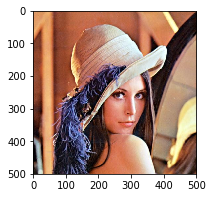

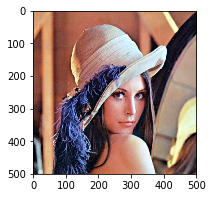

In [14]:
img_cool = img_cooler(img_lenna_origin,10,10)
my_show(img_lenna_origin)
my_show(img_cool)


(800, 1200, 3)


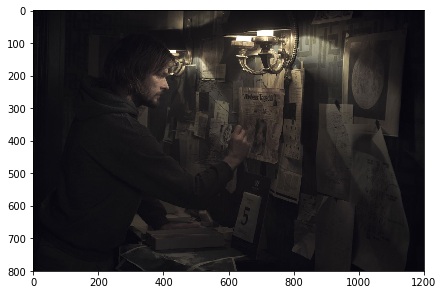

In [15]:
img_dark = cv2.imread('dark.jpg')
print(img_dark.shape)
my_show(img_dark,size=(7,7))

#### 改变伽马值 gamma change

In [16]:
def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0/gamma
    table = []
    for i in range(256):
        table.append(((i / 255.0) ** invGamma) * 255)
    table = np.array(table).astype("uint8")
    
    # TODO cv2.LUT是啥啊
    return cv2.LUT(img_dark, table)

table:
$$
255[(\frac{0}{255})^\frac{1}{\gamma}, 
 (\frac{1}{255})^\frac{1}{\gamma}, 
(\frac{2}{255})^\frac{1}{\gamma}, 
(\frac{3}{255})^\frac{1}{\gamma}, 
..., 
 (\frac{254}{255})^\frac{1}{\gamma}, 
 (\frac{255}{255})^\frac{1}{\gamma}]
$$

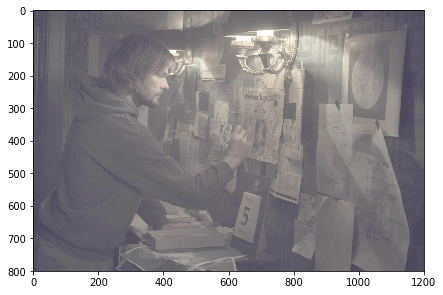

In [17]:
img_brighter = adjust_gamma(img_dark,3)
my_show(img_brighter,size=(7,7))

#### 直方图均衡 histogram equalization

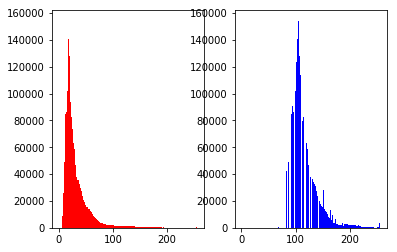

In [18]:
plt.subplot(121)
plt.hist(img_dark.flatten(), 256, [0, 256], color = 'r')

# TODO 看看hist和flatten

plt.subplot(122)
plt.hist(img_brighter.flatten(), 256, [0, 256], color = 'b')

plt.show()

#### YUV 色彩空间的Y 进行直方图均衡 来调亮图片

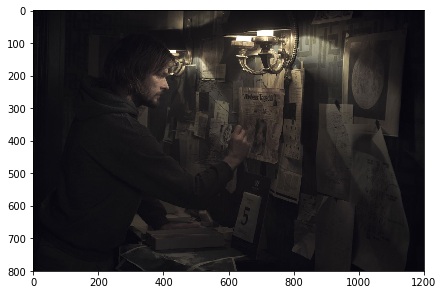

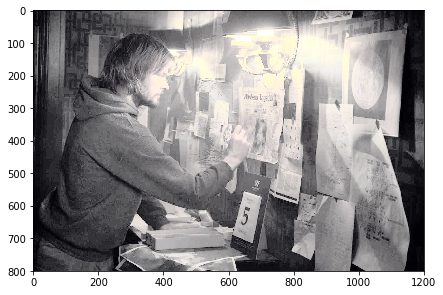

In [19]:
img_yuv = cv2.cvtColor(img_dark,cv2.COLOR_BGR2YUV) # BGR转YUV
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0]) # 对Y通道单独进行调整
# 也是三维矩阵,前两维切片用:表示完全不变, 最后一维012对应YUV
my_show(img_dark, size=(7,7))
my_show(cv2.cvtColor(img_yuv,cv2.COLOR_YUV2BGR), size=(7,7)) # YUV-BGR-RGB =.=

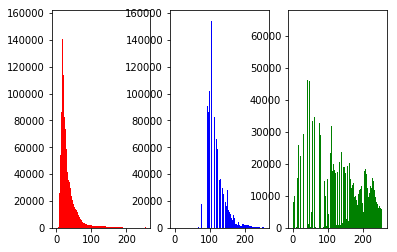

In [20]:
plt.subplot(131)
plt.hist(img_dark.flatten(),256,[0,256],color='r')
plt.subplot(132)
plt.hist(img_brighter.flatten(),256,[0,256],color='b')
plt.subplot(133)
plt.hist(cv2.cvtColor(img_yuv,cv2.COLOR_YUV2BGR).flatten(),256,[0,256],color='g')
plt.show()

#### 相似变换Similarity transform

包括：
- 平移 Translation
- 旋转 Rotation
- 放缩 Scale


只需放缩倍数、旋转角度、平移长度3个参数就可以确定, 即只需,放缩倍数再乘以一个齐次坐标(Homogeneous Coordinate):
$$
\begin{bmatrix}
x_{1}\\ 
y_{1}\\ 
1
\end{bmatrix}= s[R|t]\begin{bmatrix}
x_{0}\\ 
y_{0}\\ 
1
\end{bmatrix}= s\begin{bmatrix}
\cos a & -\sin a & t_{x}\\ 
 \sin a & cos a  & t_{y}
\end{bmatrix}
\begin{bmatrix}
x_{0}\\ 
y_{0}\\ 
1
\end{bmatrix}
$$

性质：
- 平行
- 保角性
- 保线性
- 比例不变

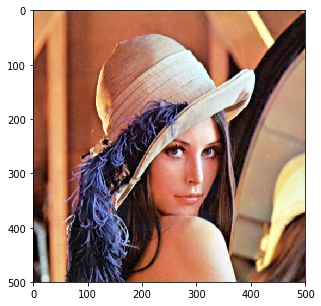

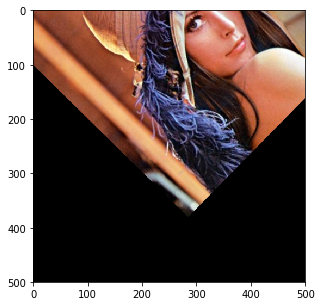

In [21]:
M_similar = cv2.getRotationMatrix2D((0,100), 45.5, 1) # center, angle, scale
img_lenna_rotate = cv2.warpAffine(img_lenna_origin, M_similar, (img_lenna_origin.shape[1], img_lenna_origin.shape[0]))
my_show(img_lenna_origin,(5,5))
my_show(img_lenna_rotate, (5,5))

#### 仿射变换 Affine Transform

需要3对点（不共线），因为6个自由度:
$$
\begin{bmatrix}x_{1}\\y_{1}\\1\end{bmatrix} =\begin{bmatrix}a&b&c\\d&e&f\\0&0&1\end{bmatrix}\begin{bmatrix}x_{0}\\y_{0}\\1\end{bmatrix} 
$$

仿射主要包括:
- 相似变换 Similarity Transform(参数多了肯定包括参数少的情况, 相似是仿射的一种特例)
  - 旋转 Rotation
  - 平移 Translation
  - 放缩 Scale
- 翻转 Flip
- 剪切 Shear

注意:
- 仿射变换不是线性的
- 仿射变换失去了保角性

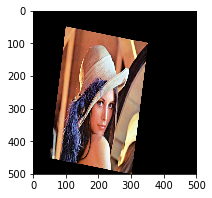

In [22]:
# Affine Transform
rows, cols, ch = img_lenna_origin.shape
pts1 = np.float32([[0, 0], [cols - 1, 0], [0, rows - 1]])
pts2 = np.float32([[cols * 0.2, rows * 0.1], [cols * 0.7, rows * 0.2], [cols * 0.1, rows * 0.9]])
# TODO 
M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img_lenna_origin, M, (cols, rows))
my_show(dst)

#### 投影变换 Perspective Transform

4个点，8个自由度:
$$
\begin{bmatrix}x_{1}\\y_{1}\\1\end{bmatrix} =\begin{bmatrix}a&b&c\\d&e&f\\g&h&i\end{bmatrix}\begin{bmatrix}x_{0}\\y_{0}\\1\end{bmatrix} 
$$

注意:
- 这是个单应性矩阵，和变换一一对应
- 满足A*A^T = 1(这个约束通过3D摄影算出来的)
- 只有保线性

[[9.58372195e-01 6.17728597e-02 1.10000000e+01]
 [7.82949144e-02 9.79274316e-01 1.30000000e+01]
 [8.58982878e-05 9.43214925e-05 1.00000000e+00]]


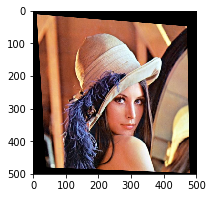

In [23]:
# 投影变换
pts1 =  np.float32([[0,0],[0,500],[500,0],[500,500]])
pts2 =  np.float32([[11,13],[40,480],[470,50],[478,497]])
# TODO 确实该好好看看numpy了
M_pst = cv2.getPerspectiveTransform(pts1, pts2)
print(M_pst)
img_lenna_pst = cv2.warpPerspective(img_lenna_origin,M_pst,(500,500))
my_show(img_lenna_pst)

####  膨胀和腐蚀 dilate and erode1

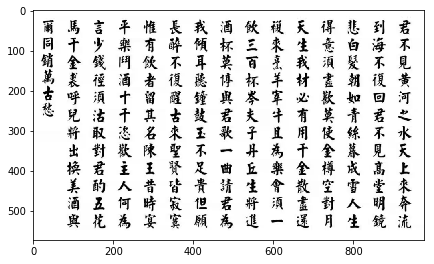

In [24]:
img_libai = cv2.imread('libai.png',0)
plt.figure(figsize=(7,7))
plt.imshow(img_libai,cmap='gray')
plt.show() 

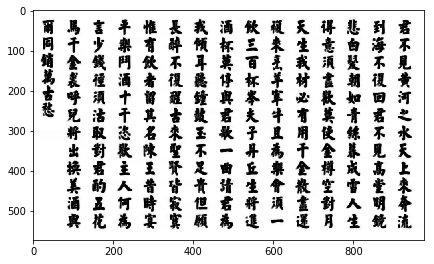

In [25]:
erode_libai = cv2.erode(img_libai,None,iterations=1)
plt.figure(figsize=(7,7))
plt.imshow(erode_libai,cmap='gray')
plt.show()
# 腐蚀膨胀,是对255(白),0(黑)用小宫格匹配,只要有一个格是什么类型,其他格也保变化

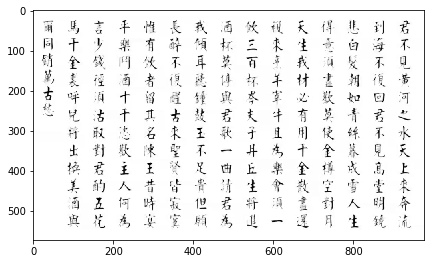

In [26]:
dilate_libai = cv2.dilate(img_libai,None,iterations=1)
plt.figure(figsize=(7,7))
plt.imshow(dilate_libai,cmap='gray')
plt.show()

 #### 数据增广 Data augmentation randomly

In [27]:
import cv2
import random
import numpy as np

def image_crop(img): # you code here
    '''randomly crop a img, considering its rows and cols
    :param img: image to be rotated, a 3d numpy array 
    return the part of the image, may return a null data
    '''
    rows, cols, channels = img.shape
    row_start = random.randint(0,rows)
    row_end = random.randint(row_start, rows)
    col_start = random.randint(0, cols)
    col_end = random.randint(col_start,cols)
    return img[row_start:row_end,col_start:col_end,:]

def color_shift(img): # you code here
    '''chage the color of an image on R,G,B channels, increase or decrease randomly
    param img: image to be changed,  a 3d numpy array
    return: image after change
    '''
    B,G,R= cv2.split(img)
    delta_b = random.randint(-255,255)
    delta_g = random.randint(-255,255)
    delta_r = random.randint(-255,255)

    def change_single_channel(channel, delta, img): # inner func, change a single channel value
        if delta_b>=0:
            channel[channel>=255-delta] = 255
            channel[channel<255-delta] = (channel[channel<255-delta] + delta).astype(img.dtype)
        else:
            channel[channel<=-delta]= 0
            channel[channel>-delta] = (channel[channel>-delta]+ delta).astype(img.dtype)
    
    change_single_channel(B,delta_b,img)
    change_single_channel(G,delta_g,img)
    change_single_channel(R,delta_r,img)
    
    # TODO merge需要看一下
    return cv2.merge((B,G,R))


def rotation(img, min_scale, max_scale): # you code here
    '''randomly get a similar image, including rotation, scaling and translation.
    :param img: image to be rotated, a 3d numpy array
    :param min_scale:min scale
    :param max_scale:max scale
    :return: a rotated image and the similarity matrix
    '''
    rows, cols, channels = img.shape
    x = random.randint(0,cols)# x,y 是列和行
    y = random.randint(0,rows)
    angle = random.uniform(0, 360)
    scale = random.uniform(min_scale, max_scale)
    M_similar = cv2.getRotationMatrix2D((x, y), angle, scale) # center, angle, scale
    img_rotate = cv2.warpAffine(img, M_similar, (cols, rows))
    return img_rotate

def perspective_transform(img): # you code here
    
    height, width, channels = img.shape

    # warp:
    random_margin = 60
    x1 = random.randint(-random_margin, random_margin)
    y1 = random.randint(-random_margin, random_margin)
    x2 = random.randint(width - random_margin - 1, width - 1)
    y2 = random.randint(-random_margin, random_margin)
    x3 = random.randint(width - random_margin - 1, width - 1)
    y3 = random.randint(height - random_margin - 1, height - 1)
    x4 = random.randint(-random_margin, random_margin)
    y4 = random.randint(height - random_margin - 1, height - 1)

    dx1 = random.randint(-random_margin, random_margin)
    dy1 = random.randint(-random_margin, random_margin)
    dx2 = random.randint(width - random_margin - 1, width - 1)
    dy2 = random.randint(-random_margin, random_margin)
    dx3 = random.randint(width - random_margin - 1, width - 1)
    dy3 = random.randint(height - random_margin - 1, height - 1)
    dx4 = random.randint(-random_margin, random_margin)
    dy4 = random.randint(height - random_margin - 1, height - 1)

    pts1 = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
    pts2 = np.float32([[dx1, dy1], [dx2, dy2], [dx3, dy3], [dx4, dy4]])
    M_warp = cv2.getPerspectiveTransform(pts1, pts2)
    img_warp = cv2.warpPerspective(img, M_warp, (width, height))
    return M_warp, img_warp

#### Test the above code:

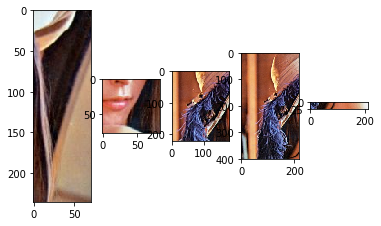

In [28]:
# image crop
for i in range(5):
    plt.subplot(150+i+1)
    img_crop_rand= image_crop(img_lenna_origin)
    plt.imshow(cv2.cvtColor(img_crop_rand,cv2.COLOR_BGR2RGB))
plt.show()


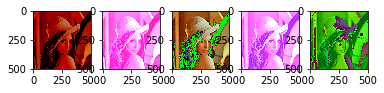

In [29]:
# color shift
for i in range(5):
    plt.subplot(150+i+1)
    img_color_rand= color_shift(img_lenna_origin)
    plt.imshow(cv2.cvtColor(img_color_rand,cv2.COLOR_BGR2RGB))
plt.show()

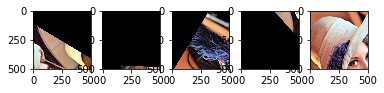

In [30]:
# image rotation
for i in range(5):
    plt.subplot(150+i+1)
    img_rotate_rand= rotation(img_lenna_origin, 0.5, 3.0)
    plt.imshow(cv2.cvtColor(img_rotate_rand,cv2.COLOR_BGR2RGB))
plt.show()

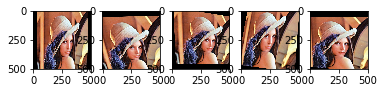

In [31]:
# perspective transform
for i in range(5):
    plt.subplot(150+i+1)
    M_warp, img_warp = perspective_transform(img_lenna_origin)
    plt.imshow(cv2.cvtColor(img_warp,cv2.COLOR_BGR2RGB))
plt.show()